# Automatisch tellen van objecten (zoals gistcellen, maar ook andere)

## Inleiding
In dit testje gaan jullie zelf aan de slag met de technieken die we hebben geleerd om gistcellen te detecteren. Jullie krijgen een beeld en moeten de verschillende stappen in de beeldverwerking doorlopen om het aantal objecten te tellen. Jullie bijdrage is vooral het *bepalen van de parameters* en *inspectie/interpretatie van de (tussen)resultaten*. 

## Praktisch
Let er nu ook op om telkens op 'play' of 'run' te klikken om een blok uit te voeren. Doe dit ook als je een parameter hebt aangepast.

## Resultaat
Jullie werken volledig in dit document. In de tekst staan er vragen, die moeten jullie beantwoorden (in de tekst). Dubbelklik om een tekst in 'edit mode' te zetten zodat jullie de tekst kunnen aanvullen. Op andere plaatsen moet je parameters wijzigen in de code om een goed resultaat te verkrijgen.

Vragen en opdrachten zien er als volgt uit:

VRAAG: *Vul hier je naam in*

OPDRACHT: *Haal 3x diep adem voordat je begint.*

Als je klaar bent dan 1/ exporteer je het document in formaat HTML, 2/ je geeft het de correcte naam _jouw voornaam_jouw achternaam_test_objecten_tellen en 3/ je doet een upload in Google Classroom.

Aan de slag!

In [10]:
# code block to initialise basic libraries: skimage, numpy and matplotlib
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib
# for creating a responsive plot
%matplotlib widget
import numpy as np

from skimage import data

## Testbeeld
We laden een testbeeld in dat jullie nu zelf gaan bewerken.

Het is een goede gewoonte om altijd je data te inspecteren voor je verder gaat, dat gaan we ook eerst doen.

image has size (337, 605) and looks like this:


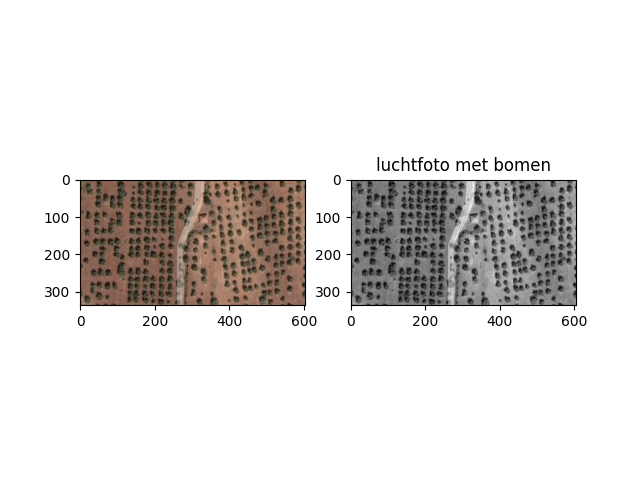

In [11]:
# code block to load and display images
# -------------------------------------
import imageio.v2 as iio

# load image stored in google drive and shared with everyone

#beeld met bomen
dataID="1mpOIj6OkclsThRI9LlPb6UuT87QBFbo7"

# beeld met cellen
#dataID="1TwkzfaiCjqnGd8nCzjsVvWOPHLl5jxcG"
url="https://drive.google.com/uc?export=download&id="+dataID
    
# load image (taken from microscopy lab) and convert to greyvalues
name = 'luchtfoto met bomen'
color_image = iio.imread(url)
#color_image = iio.imread("gistcellen_uit_microscopie_labo.jpg")
image = np.mean(color_image, axis=2)

# display images (original in color and in greyvalues)
print('image has size ' + str(image.shape) + ' and looks like this:')
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(color_image)
f.add_subplot(1,2, 2)
plt.imshow(image, cmap=plt.cm.gray)
plt.title(name)
plt.show()

VRAAG: *Wat zijn de afmetingen van dit beeld? Wat is het bereik van de grijswaarden in het beeld?*

De objecten in dit beeld zijn duidelijk herkenbaar. Om beter te begrijpen welke grijswaarden er voorkomen in het beeld kan je interactief inzoomen.

## Inzoomen op een enkel object
Zoom nu in op 1 object. Schat de coordinaten in (linksboven en rechtsonder) en vul die in de code hieronder in. De coordinaten daarvan kan je een beetje inschatten aan de hand van het interaktief zoom tooltje hierboven. Coordinaten worden weergegeven als (rij, kolom). Een deel van een beeld beschrijf je als image (rijBegin:rijEinde, kolomBegin:kolomEinde).

OPDRACHT: pas de coordinaten aan in de code hieronder.

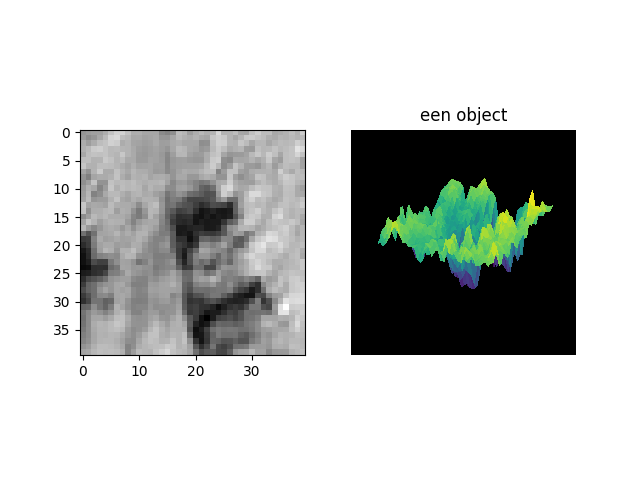

In [12]:
# code block show as landscape
# ------------------------------
from matplotlib import cm

# cut out part of the image containing 1 cell
cell = image[0:40, 0:40]

f2 = plt.figure()

# show greyvalue image of cell left
f2.add_subplot(1,2, 1)
plt.imshow(cell, cmap=plt.cm.gray)

# and landscape image of the same cell right
ax = f2.add_subplot(1,2, 2, projection='3d')

m, n=cell.shape
X, Y = np.meshgrid(np.arange(n), np.arange(m))

ax.plot_surface(X, Y, cell, cmap=cm.viridis, antialiased=False)
ax.axis("off")
ax.set_facecolor('black')
plt.title("een object")
plt.show()

# Template matching voor objecten
We gaan proberen of we alle objecten kunnen detecteren door ze te vergelijken met de afbeelding van een enkel object. Die techniek noemen we *template matching*. We gebruiken het beeld van het enkele object (opgeslagen in het beeld met naam 'cell') als een sjabloon of template waarmee we op zoek gaan naar die plaatsen in het beeld (met naam 'image') die erop lijken.

Daartoe berekenen we de correlatie tussen elke positie in het beeld 'image' met het beeld van de ene cel 'cell'. Hoe dat precies gebeurt is niet zo relevant, wel belangrijk is het om te weten dat de correlatie een waarde 1 heeft bij een perfecte match (als de omgeving in 'image' perfect overeenkomt met het template 'cell'), -1 bij een perfect tegengestelde match waarbij de grijswaarden elkaars tegengestelde zijn, en tussenliggende waarden voor andere posities.

VRAAG *Waarom is dit object geschikt voor de techniek van template matching? Welke eigenschappen ervan kunnen jullie benoemen?*

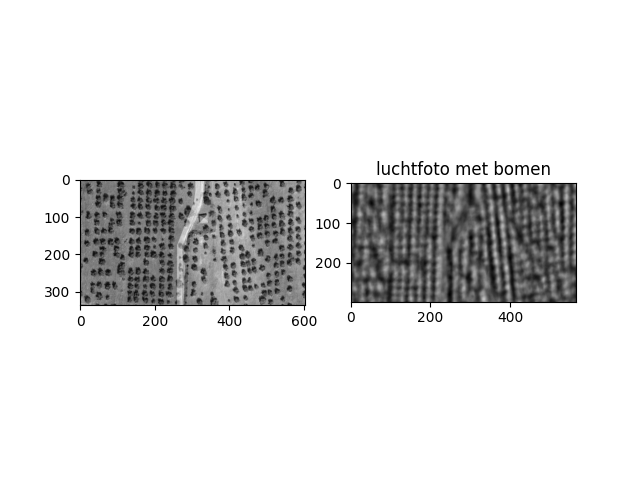

In [13]:
from skimage.feature import match_template

# calculate template matching from 'cell' to entire image
result = match_template(image, cell)

f3 = plt.figure()
f3.add_subplot(1,2, 1)
plt.imshow(image, cmap=plt.cm.gray)
f3.add_subplot(1,2, 2)
plt.imshow(result, cmap=plt.cm.gray)
plt.title(name)
plt.show()

Onderzoek de waarden in het gefilterde beeld rechts, waarop de template matching is toegepast. Vergelijk de plaatsen met objecten in het beeld links met de waarden in het beeld rechts. 

VRAAG *Welke waarde hebben de centra van de objecten in het gefilterde beeld rechts typisch?*

OPDRACHT *Zoek een drempelwaarde waarboven we de objecten kunnen detecteren en vul die hieronder in bij threshold_value.*

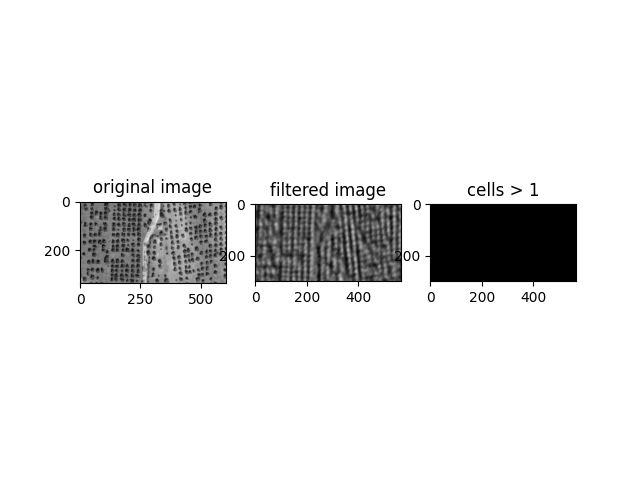

In [14]:
# code block to show thresholded image
# ------------------------------------
threshold_value = 1

thresholded_result  = result > threshold_value

# show original image, filtered image and thresholded result side-by-side
f3 = plt.figure()
f3.add_subplot(1,3, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('original image')
f3.add_subplot(1,3, 2)
plt.imshow(result, cmap=plt.cm.gray)
plt.title('filtered image')
f3.add_subplot(1,3, 3)
plt.imshow(result > threshold_value, cmap=plt.cm.gray)
plt.title('cells > ' + str(threshold_value))
plt.show()

Nu gaan we het aantal gedetecteerde objecten tellen. Daarvoor gebruiken we de "label" functie en tellen het aantal labels. Het resultaat staat hieronder.

In [15]:
# code block to label all the blobs and count them
# ---------------------------------------------------------
from skimage.measure import label, regionprops

label_image = label(thresholded_result)
#plt.figure(figsize=(7,7))
#plt.imshow(label_image)
#plt.title('label_image')
#plt.show()
print('Maximum label value is '+ str(label_image.max()))

Maximum label value is 0


VRAAG *Hoeveel objecten hebben jullie gedetecteerd? Hoe weet je dat dat aantal klopt?*

OPDRACHT *Noteer alle parameters in dit algoritme die een invloed hebben op het eindresultaat.*